# Heart Attack Analysis & Prediction

In this project, I will go through all the steps necessary for predicting heart attack chance for a patient. The steps include: 
1. Data Cleaning
2. Feature Engineering
3. Scale the data
4. Model Training & Testing Data
5. Plot Training Accuracy
6. Test Output Prediction
7. Best Test Accuracy

### Dataset Description

Gathered from: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset.

**Age:** Age of the patient

**Sex:** Sex of the patient

**cp:** Chest Pain type
 1. typical angina

 2.  atypical angina

 3. non-anginal pain

 4. asymptomatic
 
**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholesterol in mg/dl fetched via BMI sensor

**fbs:** (fasting blood sugar > 120 mg/dl)
1. 1 = true

2. 0 = false

**rest_ecg:** resting electrocardiographic results
1. Value 0: normal

2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach:** maximum heart rate achieved

exang: exercise induced angina
1. 1 = true

2. 0 = false

**old peak:** ST depression induced by exercise relative to rest

**slp:** the slope of the peak exercise ST segment

1. 0 = unsloping

2. 1 = flat

3. 2 = downsloping

**caa:** number of major vessels (0-3)

**thall:** thalassemia

1. 0 = null

2. 1 = fixed defect

3. 2 = normal

4. 3 = reversable defect

**output:** diagnosis of heart disease (angiographic disease status)

    0: < 50% diameter narrowing. less chance of heart disease
    1: > 50% diameter narrowing. more chance of heart disease

### Data Cleaning

Step 1. Importing necessary libraries and datasets as training and test.

In [514]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, QuantileTransformer, Normalizer, FunctionTransformer, RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score



#importing csv files
training_dataset = pd.read_csv('/Users/shuvobarman/Desktop/Assignment_2/dataset-A.csv')
test_dataset = pd.read_csv('/Users/shuvobarman/Desktop/Assignment_2/dataset-B.csv')

In [515]:
#checking training dataset info
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  242 non-null    int64  
 1   age         242 non-null    float64
 2   sex         242 non-null    object 
 3   cp          242 non-null    object 
 4   trtbps      242 non-null    float64
 5   chol        242 non-null    float64
 6   fbs         242 non-null    float64
 7   restecg     242 non-null    float64
 8   thalachh    242 non-null    float64
 9   exng        242 non-null    float64
 10  oldpeak     242 non-null    float64
 11  slp         242 non-null    float64
 12  caa         228 non-null    float64
 13  thall       242 non-null    float64
 14  output      242 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 28.5+ KB


In [516]:
#checking test dataset info
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  61 non-null     int64  
 1   age         61 non-null     float64
 2   sex         61 non-null     object 
 3   cp          61 non-null     object 
 4   trtbps      61 non-null     float64
 5   chol        61 non-null     float64
 6   fbs         61 non-null     float64
 7   restecg     61 non-null     float64
 8   thalachh    61 non-null     float64
 9   exng        61 non-null     float64
 10  oldpeak     61 non-null     float64
 11  slp         61 non-null     float64
 12  caa         61 non-null     float64
 13  thall       61 non-null     float64
dtypes: float64(11), int64(1), object(2)
memory usage: 6.8+ KB


In [517]:
# Checking the number of entries per dataset
print(f'Training dataset has total entry of : {len(training_dataset.age)}\n')
print(f'Test dataset has total entry of : {len(test_dataset.age)}')

Training dataset has total entry of : 242

Test dataset has total entry of : 61


Step 2: As **Unnamed: 0** column seems like a index column of dataframe when exporting to the csv files from dataframe as well as they are not any necessary columns, I am dropping them. 

In [518]:
#Dropping Unnamed Column
training_dataset = training_dataset.drop('Unnamed: 0', axis=1)
test_dataset = test_dataset.drop('Unnamed: 0', axis=1)

In [519]:
#checking for null values
training_dataset.isnull().sum()

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak      0
slp          0
caa         14
thall        0
output       0
dtype: int64

Step 3. Renaming some column names for better understanding and redability.

In [520]:
#renaming columns for better understanding
training_dataset.rename(columns = {'trtbps':'blood_pressure', 'chol':'cholestrol', 'fbs':'fasting_blood_sugar', 
                          'restecg': 'resting_electrocardiographic_result', 'thalachh':'max_heart_rate',
                          'exng': 'exercise', 'caa': 'number_of_major_vessel', 'thall': 'thalassemia'}, inplace=True)

test_dataset.rename(columns = {'trtbps':'blood_pressure', 'chol':'cholestrol', 'fbs':'fasting_blood_sugar', 
                          'restecg': 'resting_electrocardiographic_result', 'thalachh':'max_heart_rate',
                          'exng': 'exercise', 'caa': 'number_of_major_vessel', 'thall': 'thalassemia'}, inplace=True)

Step 4. Dropping any duplicates value from the training dataset

In [521]:
#dropping duplicates
training_dataset.drop_duplicates()

,age,sex,cp,blood_pressure,cholestrol,fasting_blood_sugar,resting_electrocardiographic_result,max_heart_rate,exercise,oldpeak,slp,number_of_major_vessel,thalassemia,output
0,37.0,Male,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
1,56.0,Male,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
2,57.0,Male,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
3,44.0,Male,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
4,57.0,Male,non-anginal pain,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,59.0,Male,typical angina,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
238,57.0,Female,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
239,45.0,Male,asymptomatic,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,NaN,3.0,0.0
240,68.0,Male,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


Step 4. From the null value summation of each column, we can see that **number_of_major_vessel** column has 14 null values, I am going to check the summary statistics of the column and decide on how i will replace those null values

In [522]:
#checking the mean and median and occurences of each values of caa column
print('Mean Value: ',training_dataset['number_of_major_vessel'].mean())
print('Median Value : ',training_dataset['number_of_major_vessel'].median())
print('Occurences of values :\n',training_dataset['number_of_major_vessel'].value_counts())

Mean Value:  0.7587719298245614
Median Value :  0.0
Occurences of values :
 0.0    130
1.0     48
2.0     29
3.0     17
4.0      4
Name: number_of_major_vessel, dtype: int64


Step 5. From the above summary statistics, we can see that the median value is 0.0 and mean is 0.76, as we don't have any value in this column in between 0 and 1, I will replace the missing values with the median value for the column.

In [523]:
#replacing the missing values of caa column with most occurant value
training_dataset['number_of_major_vessel'] = training_dataset['number_of_major_vessel'].fillna(training_dataset['number_of_major_vessel'].median())


Step 6. Plotting the dataframe in histogram to check the data distribution

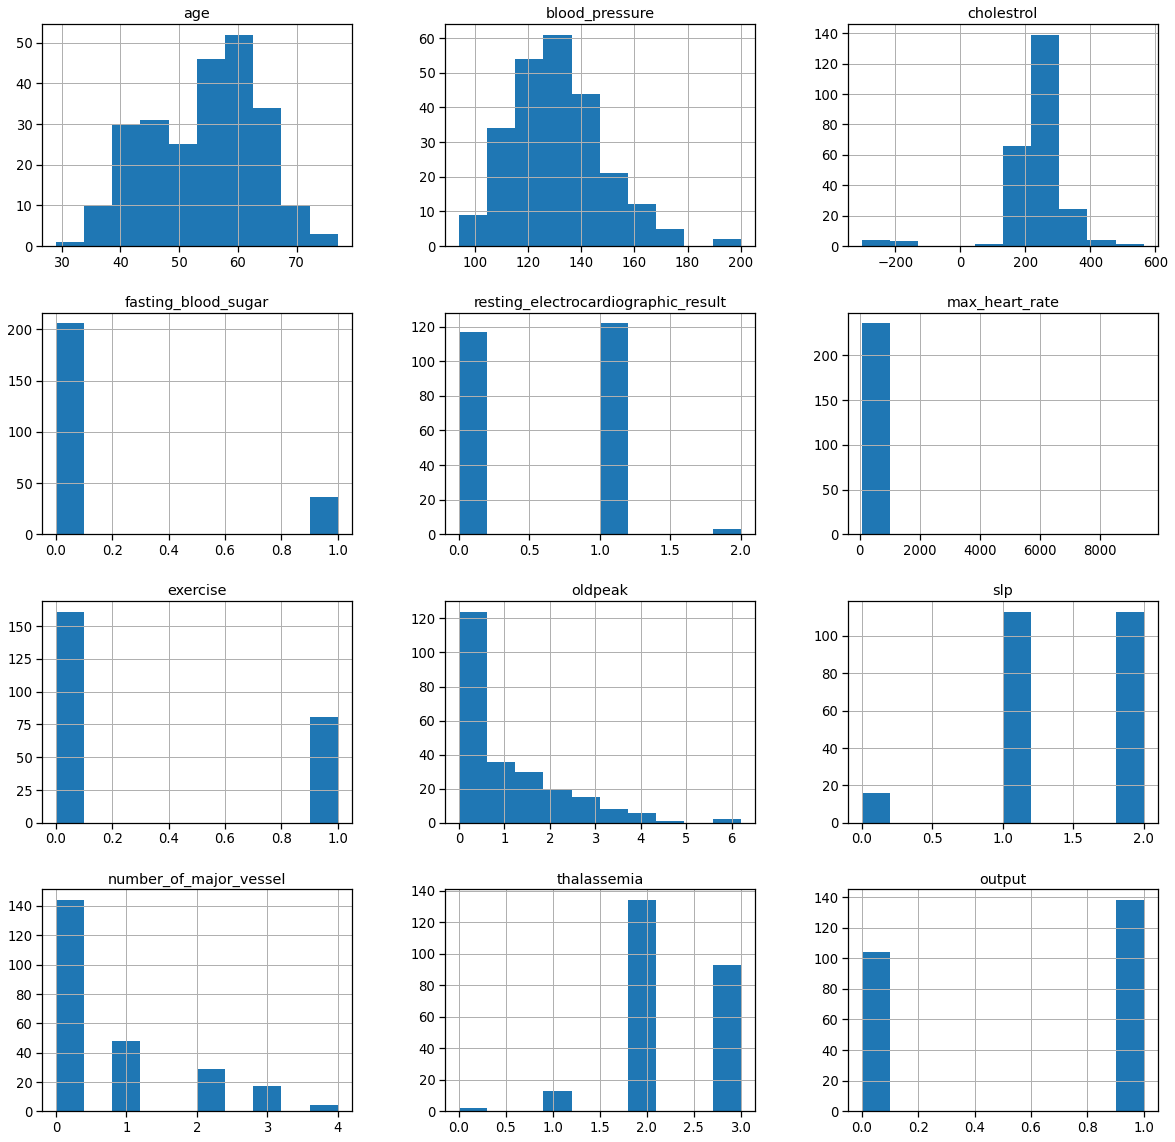

In [524]:
#plotting the distribution of the training dataset
training_dataset.hist(figsize=(20,20), bins=10);

In [525]:
#describing the training dataset
training_dataset.describe()

,age,blood_pressure,cholestrol,fasting_blood_sugar,resting_electrocardiographic_result,max_heart_rate,exercise,oldpeak,slp,number_of_major_vessel,thalassemia,output
count,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.107438,130.925620,232.661157,0.14876,0.528926,285.376033,0.334711,1.030579,1.400826,0.714876,2.314050,0.570248
std,9.416417,17.055032,95.146409,0.35659,0.524494,951.882269,0.472867,1.194722,0.611507,1.033317,0.611549,0.496067
min,29.000000,94.000000,-303.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,208.250000,0.00000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,240.000000,0.00000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,269.750000,0.00000,1.000000,169.750000,1.000000,1.750000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.00000,2.000000,9466.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Step 7. From the histogram as well as dataframe description, it's not easy to find the outliers for all the columns but we can see **number_of_major_vessel** column has some outliers as it has max value of 4 but in data description it was described as to have max value of 3. For better understanding  i will plot some columns in boxplot for checking outliers.

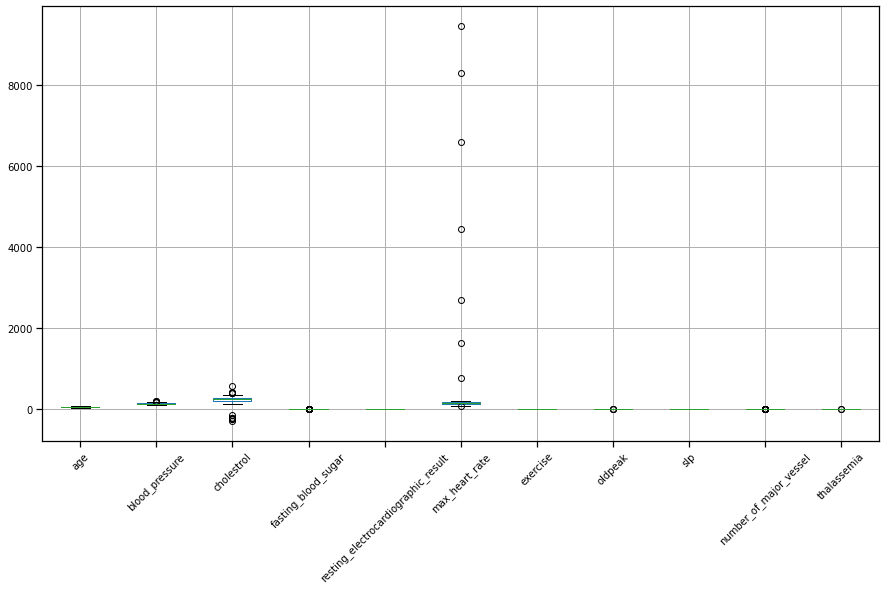

In [526]:
#plotting columns in boxplot to check which columns have outliers
column_names = ['age','blood_pressure','cholestrol','fasting_blood_sugar','resting_electrocardiographic_result',
                'max_heart_rate','exercise','oldpeak','slp','number_of_major_vessel','thalassemia']
training_dataset.boxplot(figsize = (15,8), column=column_names, fontsize=10, rot=45);

Step 8. From the boxplot we can see that, we have outliers in many columns and to remove outliers i will use **Z-score** method. For that reason, i will define a function which will take dataframe, columns and no of standard deviations as the perameters. As for **no of standard deviations** i will take 3 as by using 3 standard deviations we remove the 0.3% extreme cases.

In [527]:
#removing outliers
def remove_outliers(df,columns,n_std):
    for col in columns:
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

#defining columns which have outliers
ouliers_column = ['blood_pressure','cholestrol','max_heart_rate','oldpeak','number_of_major_vessel']

#Creating a new dataset after applying outlier removing method on training dataset
training_ds_updated = remove_outliers(training_dataset, ouliers_column, 3)

#checking data description of newly dataset after removing outliers
training_ds_updated.describe()

,age,blood_pressure,cholestrol,fasting_blood_sugar,resting_electrocardiographic_result,max_heart_rate,exercise,oldpeak,slp,number_of_major_vessel,thalassemia,output
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,54.065502,130.078603,231.432314,0.144105,0.528384,166.764192,0.340611,0.976419,1.419214,0.624454,2.288210,0.567686
std,9.404650,15.851917,94.882064,0.351965,0.525931,194.951605,0.474953,1.088280,0.591443,0.916953,0.610501,0.496483
min,29.000000,94.000000,-303.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,208.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,178.000000,417.000000,1.000000,2.000000,2686.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


Step 9. Creating boxplot to check if we have anymore outliers in the dataframe as from the dataframe description we can assume that we might have some outliers left.

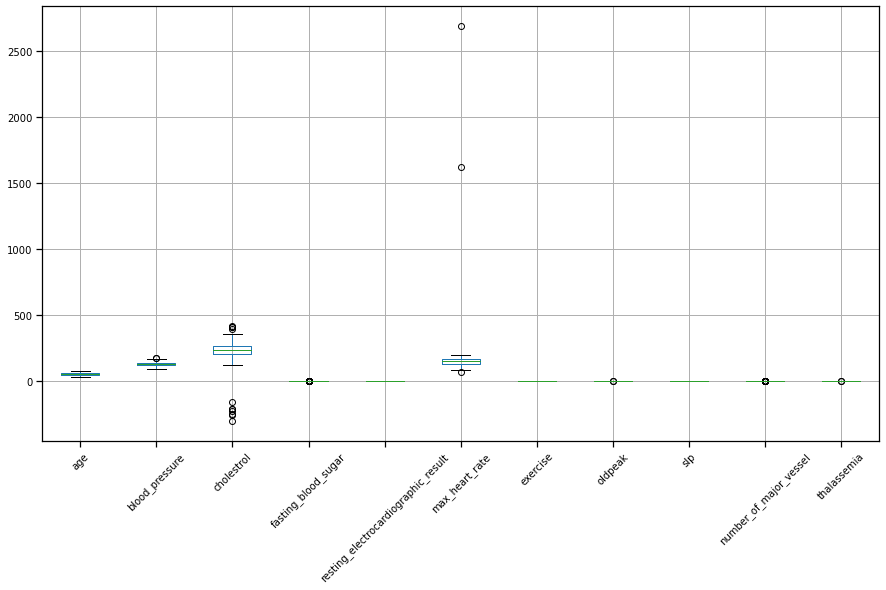

In [528]:
#checking updated dataset 
column_names = ['age','blood_pressure','cholestrol','fasting_blood_sugar','resting_electrocardiographic_result',
                'max_heart_rate','exercise','oldpeak','slp','number_of_major_vessel','thalassemia']
training_ds_updated.boxplot(figsize = (15,8), column=column_names, fontsize=10, rot=45);

Step 10. We can see that **cholestrol** & **max_heart_rate** columns have some major outliers and we want to ommit that. To do so, I am checking how instances are in these columns

In [529]:
training_ds_updated['cholestrol'].value_counts().sort_values(ascending=False)

234.0    6
204.0    4
240.0    4
254.0    4
226.0    4
        ..
231.0    1
200.0    1
259.0    1
273.0    1
193.0    1
Name: cholestrol, Length: 140, dtype: int64

In [530]:
training_ds_updated['max_heart_rate'].value_counts().sort_values(ascending=False)

163.0    7
152.0    6
162.0    6
172.0    6
125.0    6
        ..
103.0    1
134.0    1
97.0     1
99.0     1
90.0     1
Name: max_heart_rate, Length: 86, dtype: int64

Step 11. **cholestrol** & **max_heart_rate** cannot be replace with most occurant values as it might confuse the model which will predict as well as it will not mimic the real life scenario. For that reason, I am replacing the outliers with median value for respective columns.

In [531]:
#replacing the values of remaining outliers

#cholestrol
#setting the condition
condition_cholestrol = training_ds_updated['cholestrol']<0 
condition_cholestrol_2 = training_ds_updated['cholestrol']>300

#updating
training_ds_updated.loc[condition_cholestrol, 'cholestrol'] = training_ds_updated['cholestrol'].median()
training_ds_updated.loc[condition_cholestrol_2, 'cholestrol'] = training_ds_updated['cholestrol'].median()


#thalachh
#setting the condition
condition_max_heart_rate = training_ds_updated['max_heart_rate']> training_ds_updated['max_heart_rate'].median() 

#updating
training_ds_updated.loc[condition_max_heart_rate, 'max_heart_rate'] = training_ds_updated['max_heart_rate'].median() 


Step 12. Plotting the dafaframe to check if there are any more outliers left

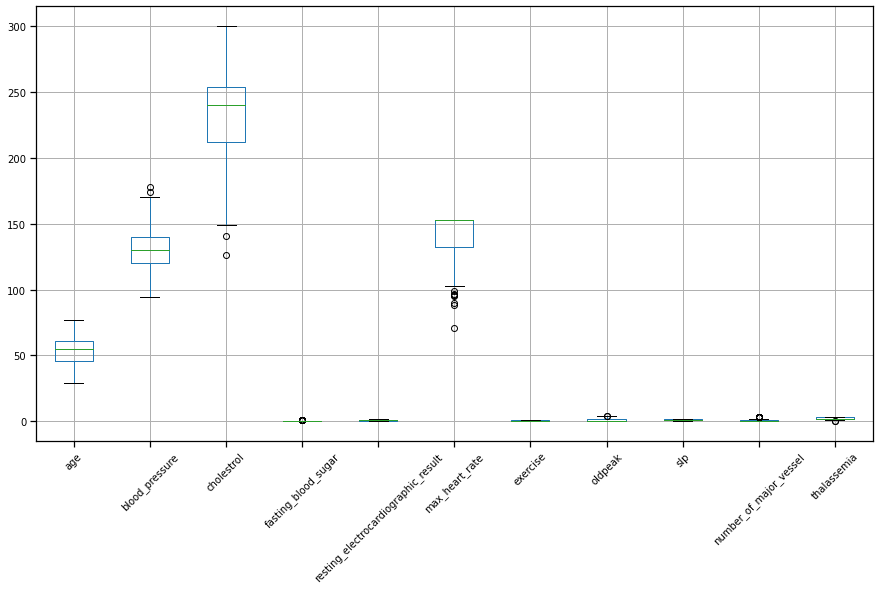

In [532]:
#plotting the updated dataset 
column_names = ['age','blood_pressure','cholestrol','fasting_blood_sugar','resting_electrocardiographic_result',
                'max_heart_rate','exercise','oldpeak','slp','number_of_major_vessel','thalassemia']
training_ds_updated.boxplot(figsize = (15,8), column=column_names, fontsize=10, rot=45);

From the box plot we can see that for **blood_pressure**, **max_heart_rate**, **cholesterol**  columns we still have some values either above or less point of whiskers. I will leave them as they are.

In [533]:
# Checking the number of entries per dataset
print(f'Updated Training dataset has total entry of : {len(training_ds_updated.age)}\n')

Updated Training dataset has total entry of : 229



In the initial dataset we had 242 entries and after cleaning data we have 229 entries. 

###  Feature Engineering 


Step 1.**Categorical Variables Encoding** : Sex and Chest pain Label Encoding

In [534]:
sex_mapping = {'Male': 1, 'Female': 2}
chest_pain_mapping = {'non-anginal pain': 1,
                     'atypical angina' : 2,
                     'typical angina' : 3,
                     'asymptomatic': 4}

training_ds_updated['sex'] = training_ds_updated['sex'].replace(sex_mapping)
training_ds_updated['cp'] = training_ds_updated['cp'].replace(chest_pain_mapping)

test_dataset['sex'] = test_dataset['sex'].replace(sex_mapping)
test_dataset['cp'] = test_dataset['cp'].replace(chest_pain_mapping)

Step 2. Checking the corelation between the attributes

In [535]:
#checking relationship with the datas
training_ds_updated.corr()

,age,sex,cp,blood_pressure,cholestrol,fasting_blood_sugar,resting_electrocardiographic_result,max_heart_rate,exercise,oldpeak,slp,number_of_major_vessel,thalassemia,output
age,1.000000,0.098458,0.122682,0.281778,0.129826,0.152163,-0.088608,-0.308480,0.132451,0.215702,-0.162661,0.380754,0.067740,-0.258800
sex,0.098458,1.000000,-0.151200,0.063668,0.037414,-0.055168,0.058380,0.080433,-0.160464,-0.152235,-0.004377,-0.091762,-0.200176,0.266598
cp,0.122682,-0.151200,1.000000,0.088505,0.059720,-0.092779,-0.122534,-0.254291,0.331357,0.244501,-0.189654,0.197415,0.149623,-0.415181
blood_pressure,0.281778,0.063668,0.088505,1.000000,0.062410,0.181911,-0.130211,-0.049969,0.060509,0.151406,-0.110659,0.127866,0.023935,-0.151147
cholestrol,0.129826,0.037414,0.059720,0.062410,1.000000,-0.006127,-0.188824,-0.032715,0.053753,-0.063381,0.033199,0.211456,0.085439,-0.128317
fasting_blood_sugar,0.152163,-0.055168,-0.092779,0.181911,-0.006127,1.000000,-0.057735,0.013657,0.019936,0.032956,-0.059712,0.195600,-0.092075,-0.068612
resting_electrocardiographic_result,-0.088608,0.058380,-0.122534,-0.130211,-0.188824,-0.057735,1.000000,-0.034099,-0.144225,-0.040205,0.017979,-0.141504,-0.011930,0.122787
max_heart_rate,-0.308480,0.080433,-0.254291,-0.049969,-0.032715,0.013657,-0.034099,1.000000,-0.293394,-0.250936,0.316030,-0.217426,-0.083485,0.366725
exercise,0.132451,-0.160464,0.331357,0.060509,0.053753,0.019936,-0.144225,-0.293394,1.000000,0.321931,-0.276339,0.164081,0.219626,-0.451596
oldpeak,0.215702,-0.152235,0.244501,0.151406,-0.063381,0.032956,-0.040205,-0.250936,0.321931,1.000000,-0.535158,0.361162,0.214918,-0.495445


Step 3.For better understanig of each variable with output we will Checking correlation of output with every other columns of the dataframe.

In [536]:
training_ds_updated.corr()['output'].sort_values(ascending=False)

output                                 1.000000
slp                                    0.380913
max_heart_rate                         0.366725
sex                                    0.266598
resting_electrocardiographic_result    0.122787
fasting_blood_sugar                   -0.068612
cholestrol                            -0.128317
blood_pressure                        -0.151147
age                                   -0.258800
thalassemia                           -0.397457
cp                                    -0.415181
exercise                              -0.451596
number_of_major_vessel                -0.483433
oldpeak                               -0.495445
Name: output, dtype: float64

We can see that which columns have negative correlation with output and which column have positive correlation 

Step 4. Plotting counterplot for categorical variable

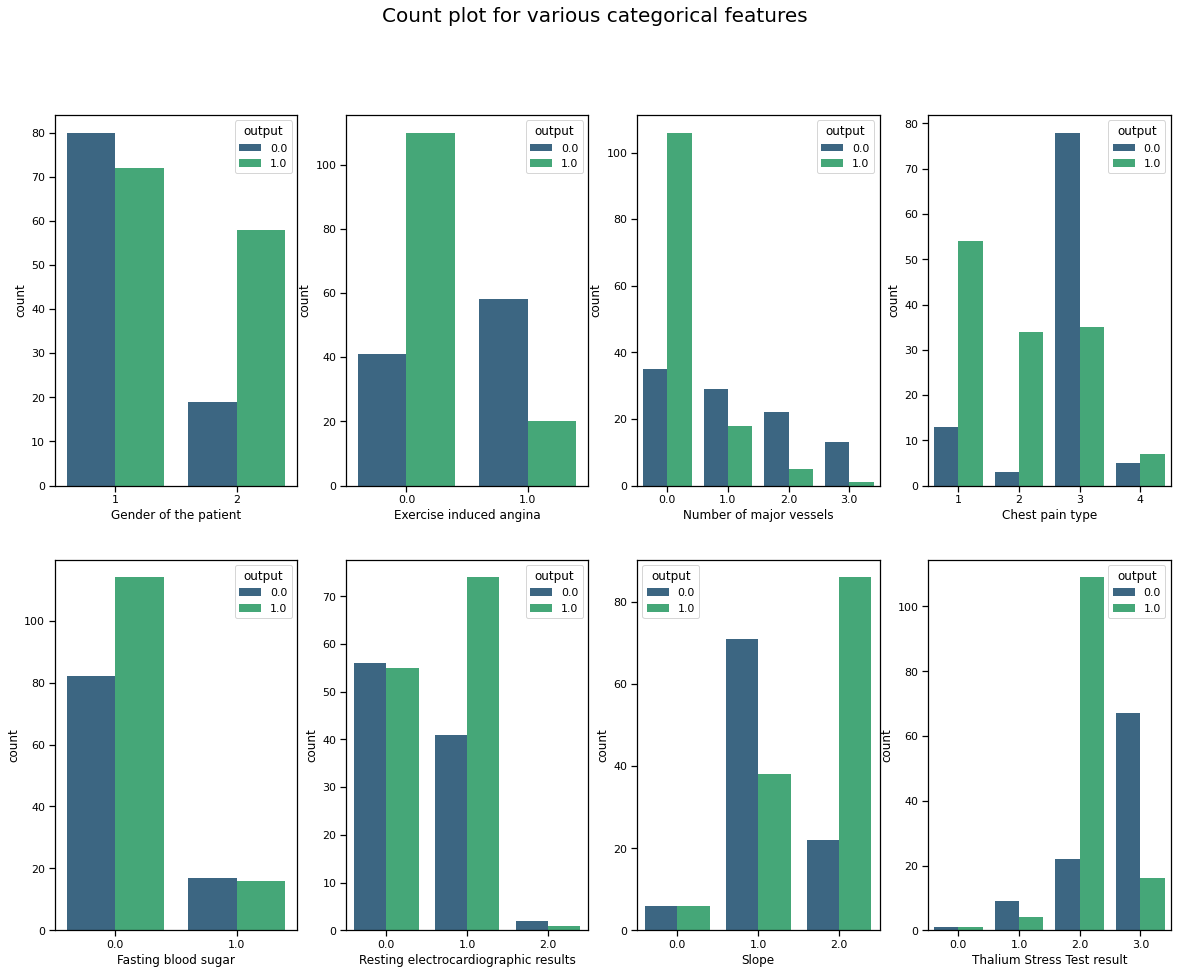

In [537]:
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(2, 4, figsize = (20, 15))
ax=ax.flatten() 


plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= training_ds_updated, ax= ax[0], hue = 'output' ,palette= 'viridis')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exercise', data= training_ds_updated, hue= 'output', ax= ax[1], palette= 'viridis')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='number_of_major_vessel', data= training_ds_updated, ax= ax[2], hue = 'output', palette= 'viridis')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= training_ds_updated, hue = 'output', ax= ax[3], palette= 'viridis')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fasting_blood_sugar', data= training_ds_updated, hue = 'output', ax= ax[4], palette= 'viridis')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='resting_electrocardiographic_result', data= training_ds_updated, ax= ax[5], hue = 'output', palette= 'viridis')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= training_ds_updated, ax= ax[6], hue = 'output', palette= 'viridis')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thalassemia', data= training_ds_updated, ax= ax[7], hue = 'output', palette= 'viridis')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()

Step 5. Plotting Continious Variable

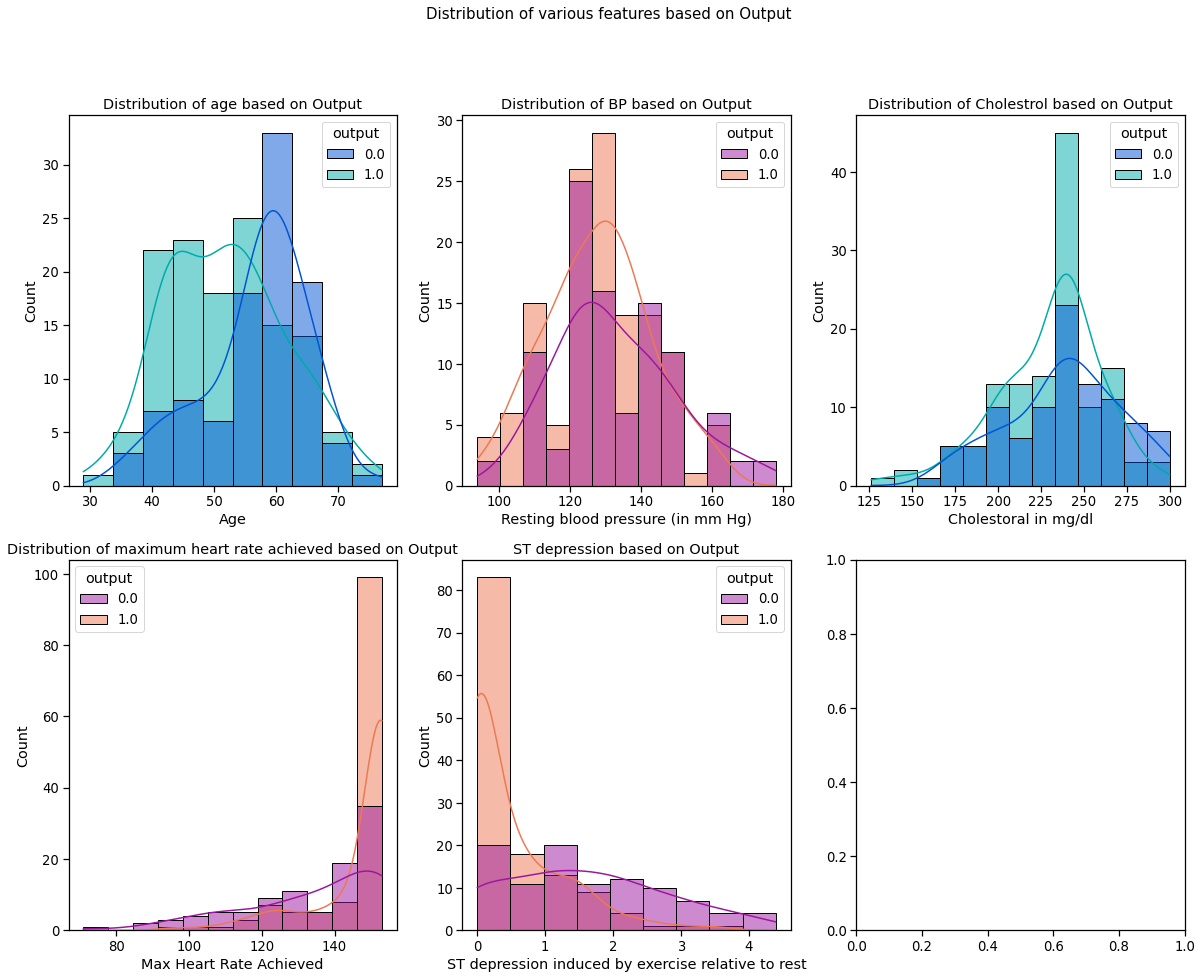

In [538]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 3, figsize = (20, 15))
ax=ax.flatten() 

plt.suptitle('Distribution of various features based on Output', fontsize = 15)

ax1 = sns.histplot(x ='age', data= training_ds_updated, hue= 'output', kde= True, ax= ax[0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on Output')

ax2 = sns.histplot(x ='blood_pressure', data= training_ds_updated, hue= 'output', kde= True, ax= ax[1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on Output')

ax3 = sns.histplot(x ='cholestrol', data= training_ds_updated, hue= 'output', kde= True, ax= ax[2], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on Output')

ax4 = sns.histplot(x ='max_heart_rate', data= training_ds_updated, hue= 'output', kde= True, ax= ax[3], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on Output')


ax5 = sns.histplot(x ='oldpeak', data= training_ds_updated, hue= 'output', kde= True, ax= ax[4], palette='plasma')
ax5.set(xlabel = 'ST depression induced by exercise relative to rest', title= 'ST depression based on Output')

plt.show()


Step 6. Dummy Encoding for Features

In [539]:
#defining categorical columns
categorical_columns = ['sex', 'number_of_major_vessel', 'cp', 'fasting_blood_sugar', 
                       'resting_electrocardiographic_result', 'slp', 'thalassemia']

#converting categorical values to str
training_ds_updated[categorical_columns] = training_ds_updated[categorical_columns].astype('str')
test_dataset[categorical_columns] = test_dataset[categorical_columns].astype('str')

#encoding training dataset with get_dummies
training_ds_updated = pd.get_dummies(training_ds_updated, drop_first=True)
test_dataset = pd.get_dummies(test_dataset, drop_first=True)
training_ds_updated.head()



,age,blood_pressure,cholestrol,max_heart_rate,exercise,oldpeak,output,sex_2,cp_2,cp_3,...,resting_electrocardiographic_result_1.0,resting_electrocardiographic_result_2.0,slp_1.0,slp_2.0,number_of_major_vessel_1.0,number_of_major_vessel_2.0,number_of_major_vessel_3.0,thalassemia_1.0,thalassemia_2.0,thalassemia_3.0
0,37.0,130.0,250.0,153.0,0.0,3.5,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,56.0,120.0,236.0,153.0,0.0,0.8,1.0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,57.0,140.0,192.0,148.0,0.0,0.4,1.0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
3,44.0,120.0,263.0,153.0,0.0,0.0,1.0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,57.0,150.0,168.0,153.0,0.0,1.6,1.0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [540]:
test_dataset.head()

,age,blood_pressure,cholestrol,max_heart_rate,exercise,oldpeak,sex_2,cp_2,cp_3,cp_4,...,resting_electrocardiographic_result_1.0,resting_electrocardiographic_result_2.0,slp_1.0,slp_2.0,number_of_major_vessel_1.0,number_of_major_vessel_2.0,number_of_major_vessel_3.0,number_of_major_vessel_4.0,thalassemia_2.0,thalassemia_3.0
0,59.0,110.0,239.0,142.0,1.0,1.2,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,70.0,130.0,322.0,109.0,0.0,2.4,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,57.0,110.0,335.0,143.0,1.0,3.0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
3,64.0,170.0,227.0,155.0,0.0,0.6,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,49.0,118.0,149.0,126.0,0.0,0.8,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [541]:
training_ds_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 241
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      229 non-null    float64
 1   blood_pressure                           229 non-null    float64
 2   cholestrol                               229 non-null    float64
 3   max_heart_rate                           229 non-null    float64
 4   exercise                                 229 non-null    float64
 5   oldpeak                                  229 non-null    float64
 6   output                                   229 non-null    float64
 7   sex_2                                    229 non-null    uint8  
 8   cp_2                                     229 non-null    uint8  
 9   cp_3                                     229 non-null    uint8  
 10  cp_4                                     229 non-n

### Scale the Data

Step 1. Defining Value Columns

In [542]:
val_cols_names = ['age','blood_pressure', 'cholestrol', 'max_heart_rate', 'oldpeak']

Step 2. Checking for Skewness

In [543]:
#defining functions for checking skewness
def skewness(data):
    #numeric columns are taken for checking skewness and storing them in new dataframe
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    return skew_df

skewness(data=training_ds_updated[val_cols_names])

,Feature,Skew,Absolute Skew
0,age,-0.144134,0.144134
1,blood_pressure,0.338446,0.338446
2,cholestrol,-0.442099,0.442099
3,max_heart_rate,-1.566255,1.566255
4,oldpeak,1.054998,1.054998


In [544]:
#checking skewness for test data set as well
skewness(data=test_dataset[val_cols_names])

,Feature,Skew,Absolute Skew
0,age,-0.256757,0.256757
1,blood_pressure,0.668239,0.668239
2,cholestrol,0.192672,0.192672
3,max_heart_rate,-0.681778,0.681778
4,oldpeak,0.715005,0.715005


From the above table we can see that we have skewness in **blood_pressure** & **oldpeak** column of train dataset and for test dataset we have skewness in **blood_pressure**, **cholestrol** & **oldpeak** columns, I will apply log transformation.

Step 3. Applying Log transformation on both test and training dataset

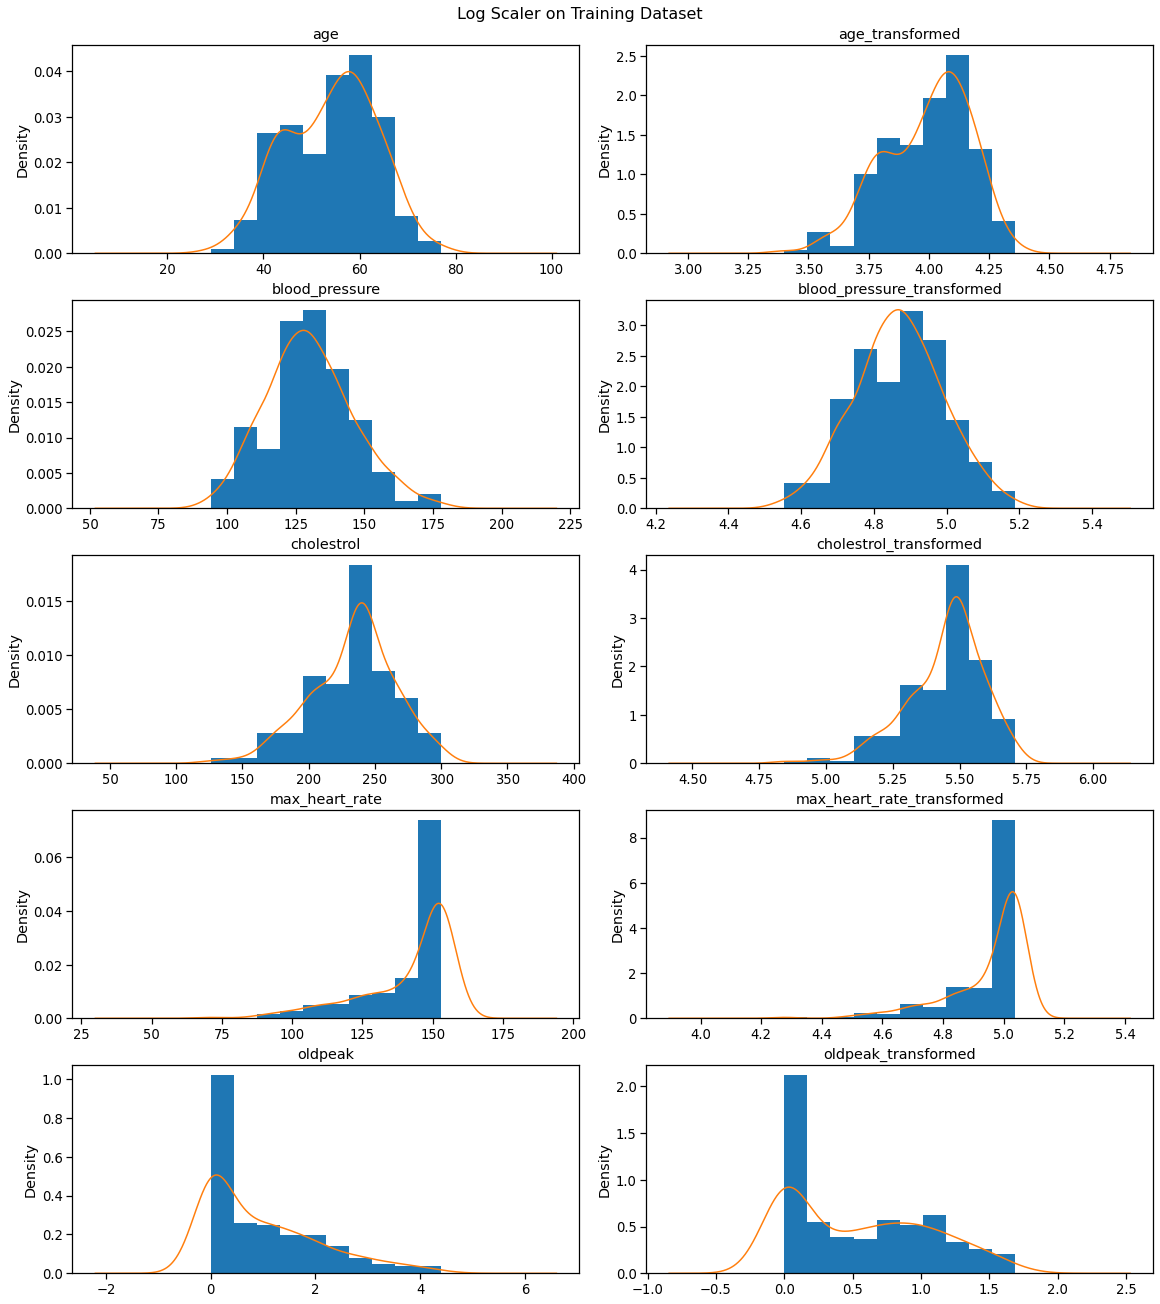

In [545]:
#applying transformation on training dataset
scaler = FunctionTransformer(np.log1p)
log_tdf = scaler.fit_transform(training_ds_updated)
log_tdf = pd.DataFrame(log_tdf, index=training_ds_updated.index, columns=val_cols_names)

#plotting training dataset
plot_histograms_density(training_ds_updated, val_cols_names, log_tdf, 'Log Scaler on Training Dataset')

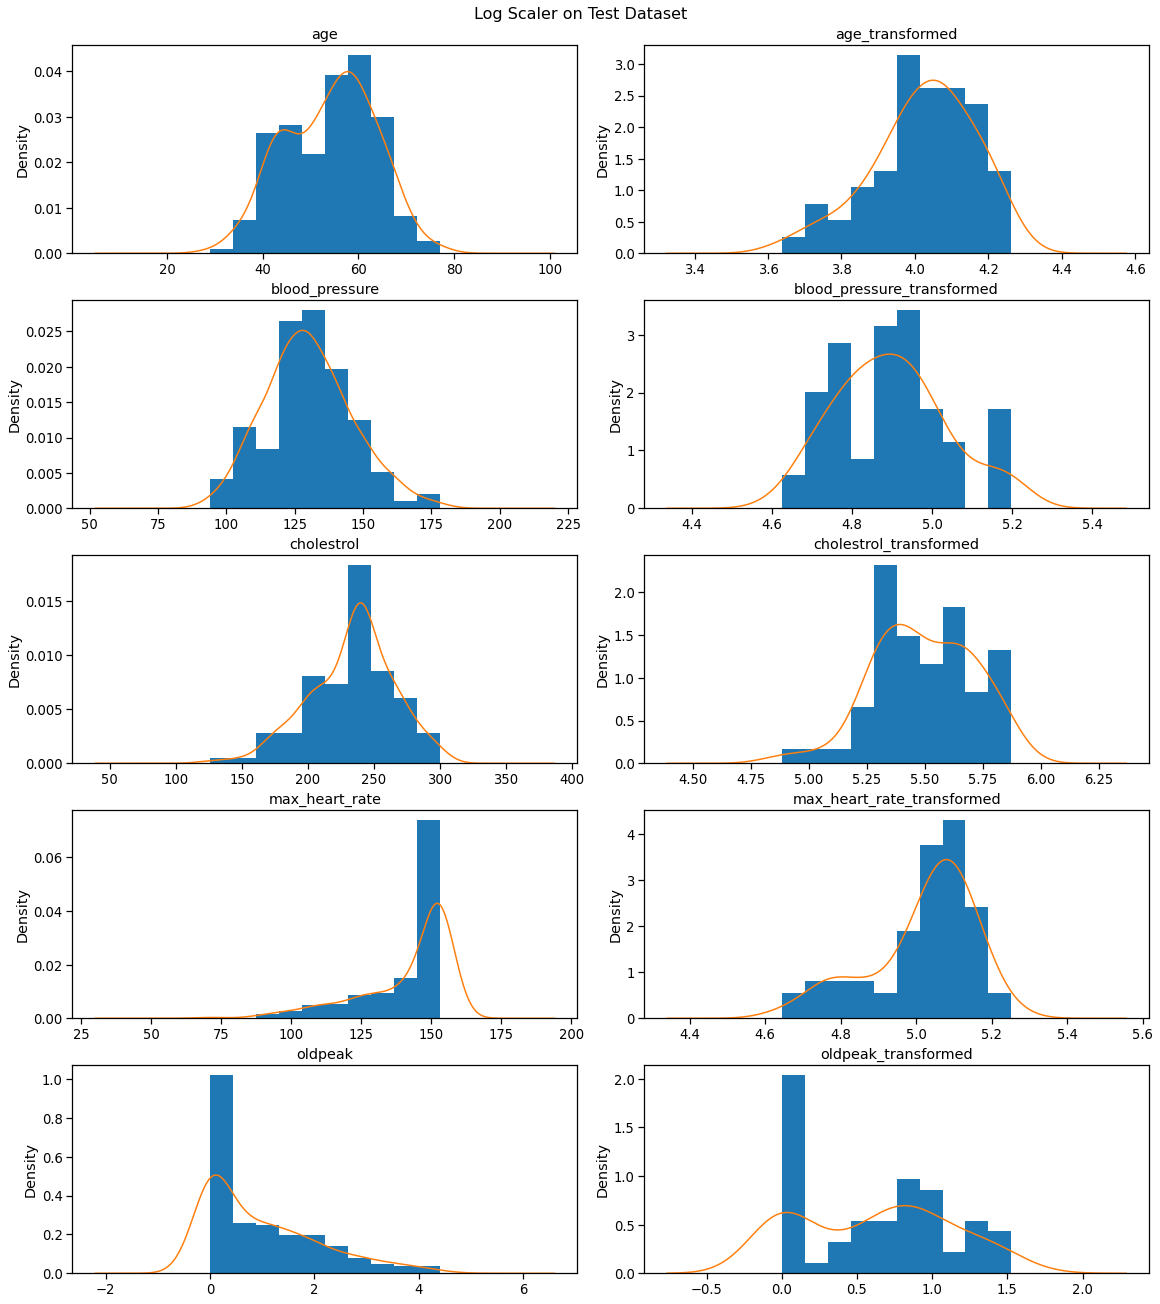

In [546]:
#applying transformation on test dataset
scaler = FunctionTransformer(np.log1p)
log_tdf = scaler.fit_transform(test_dataset)
log_tdf = pd.DataFrame(log_tdf, index=test_dataset.index, columns=val_cols_names)

#plotting Test dataset
plot_histograms_density(test_dataset, val_cols_names, log_tdf, 'Log Scaler on Test Dataset')

Step 4. As we know we have some outliers in our data, I will apply **robust transformation** on the data. 
Applying Robust transformation


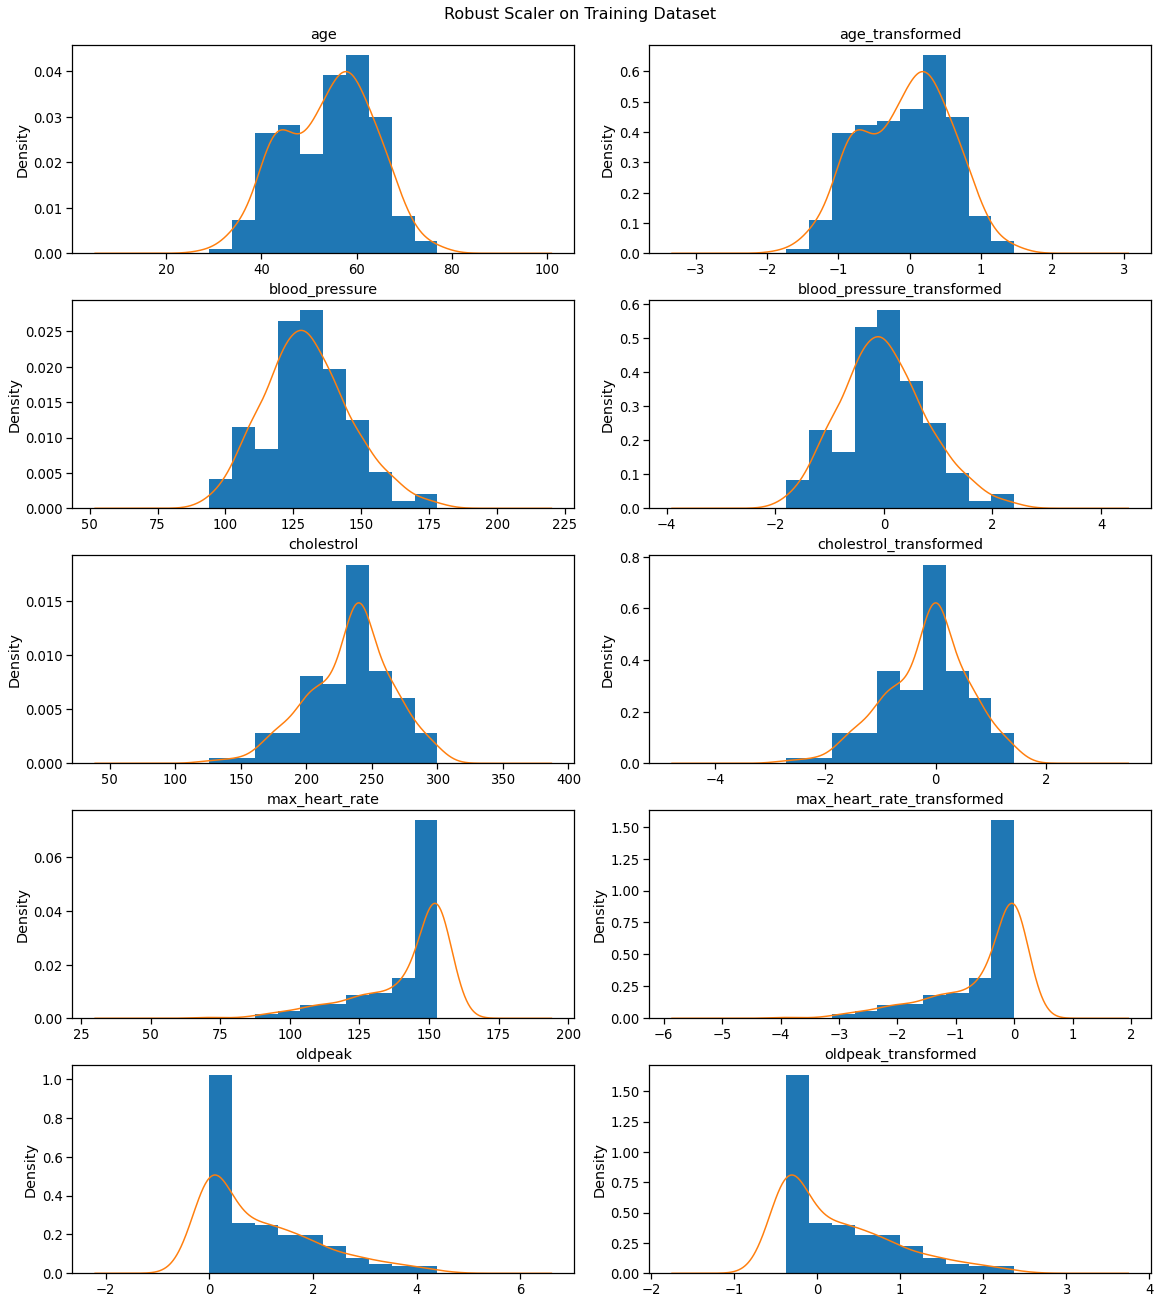

In [547]:
# transform the data
scaler = RobustScaler()
robust_tdf = scaler.fit_transform(training_ds_updated[val_cols_names])
robust_tdf = pd.DataFrame(robust_tdf, index=training_ds_updated.index, columns=val_cols_names)

#plotting training dataset
plot_histograms_density(training_ds_updated, val_cols_names, robust_tdf, 'Robust Scaler on Training Dataset')

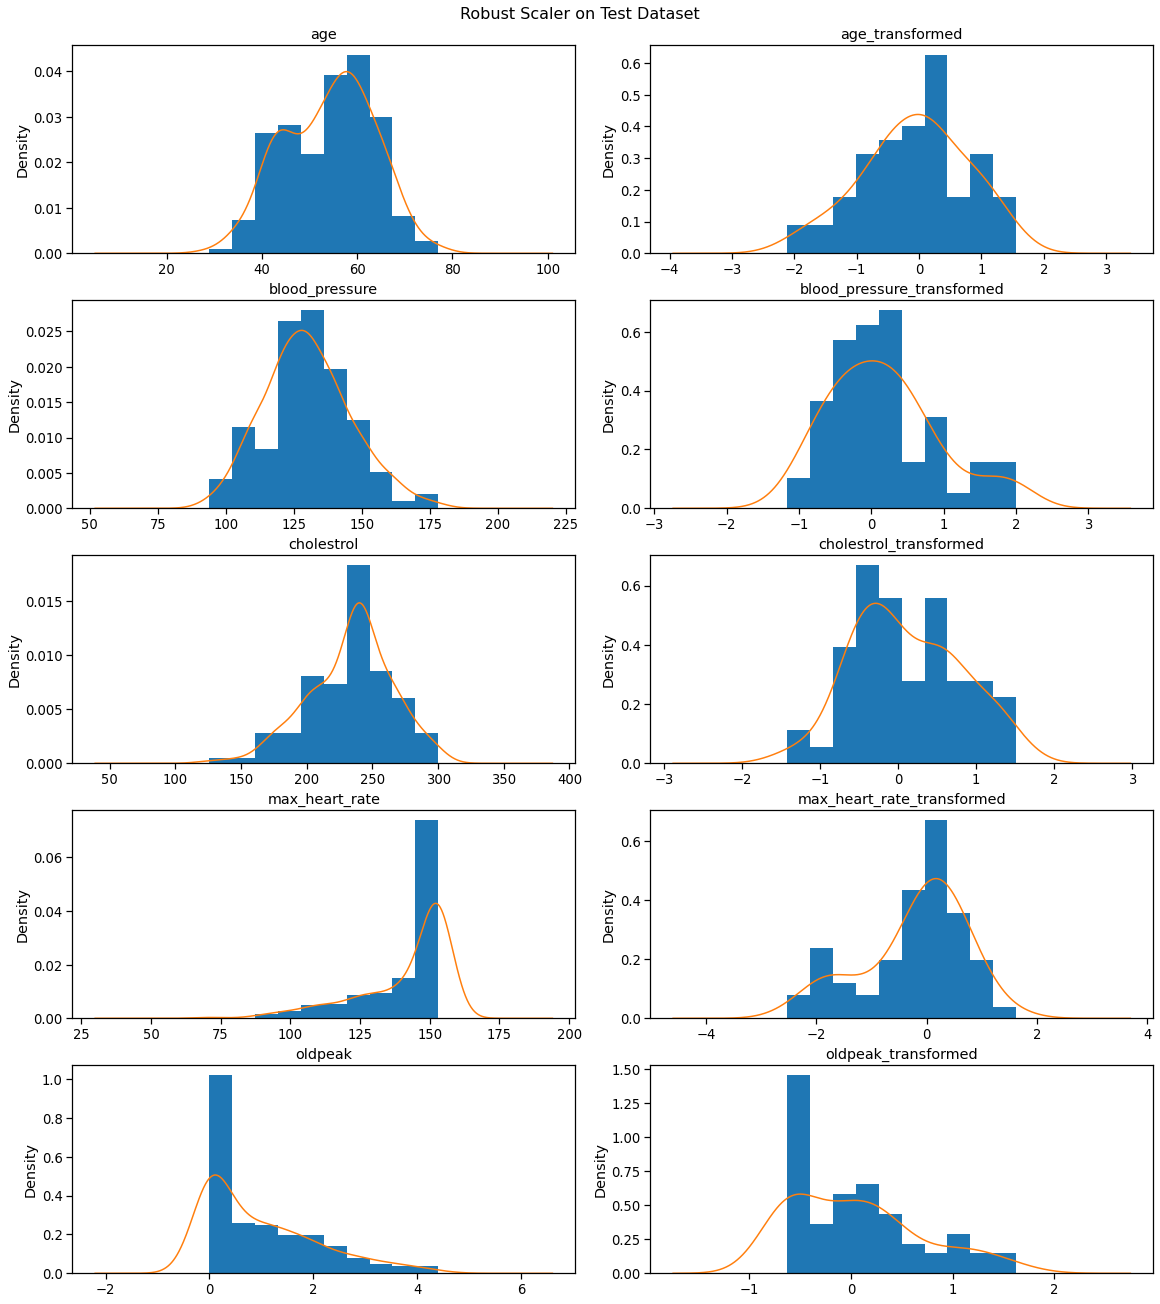

In [548]:
# transform the data
scaler = RobustScaler()
robust_tdf = scaler.fit_transform(test_dataset[val_cols_names])
robust_tdf = pd.DataFrame(robust_tdf, index=test_dataset.index, columns=val_cols_names)

#plotting test dataset
plot_histograms_density(test_dataset, val_cols_names, robust_tdf, 'Robust Scaler on Test Dataset')

Step 5. As we have different units in our columns as well as value ranges, I will apply Standardization Technique for that. Applying Standardization Technique.

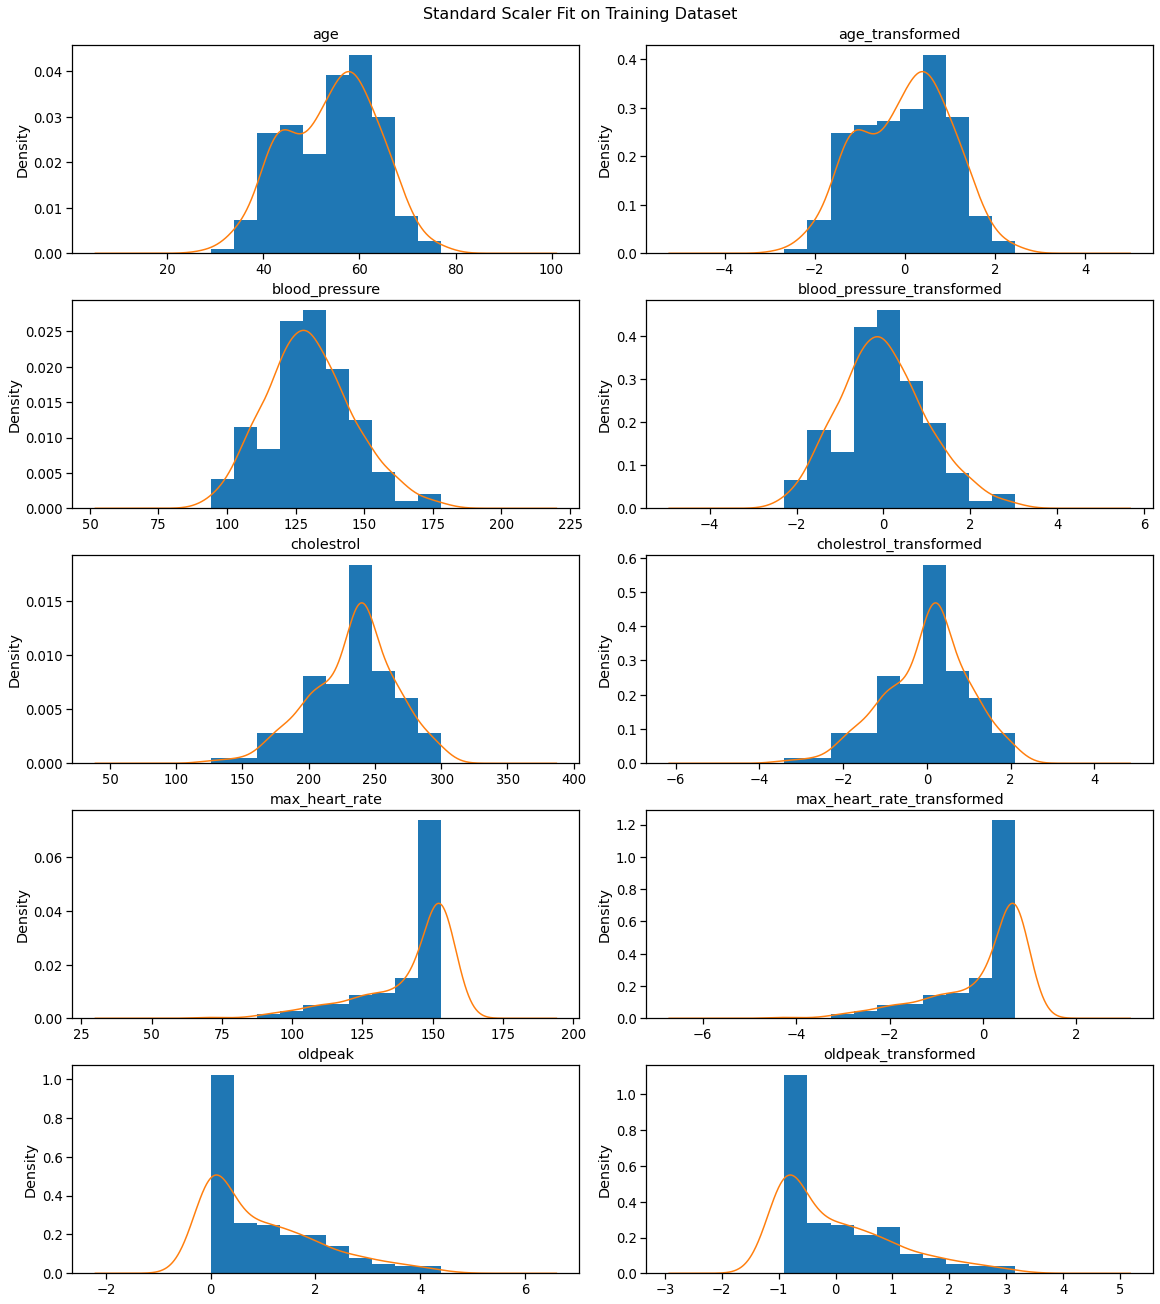

In [549]:
#transform the data
scaler=StandardScaler()
scaler_fit = scaler.fit_transform(training_ds_updated[val_cols_names])
scaler_fit = pd.DataFrame(scaler_fit, index=training_ds_updated.index, columns=val_cols_names)

#plotting the training dataset
plot_histograms_density(training_ds_updated, val_cols_names, scaler_fit, 'Standard Scaler Fit on Training Dataset')

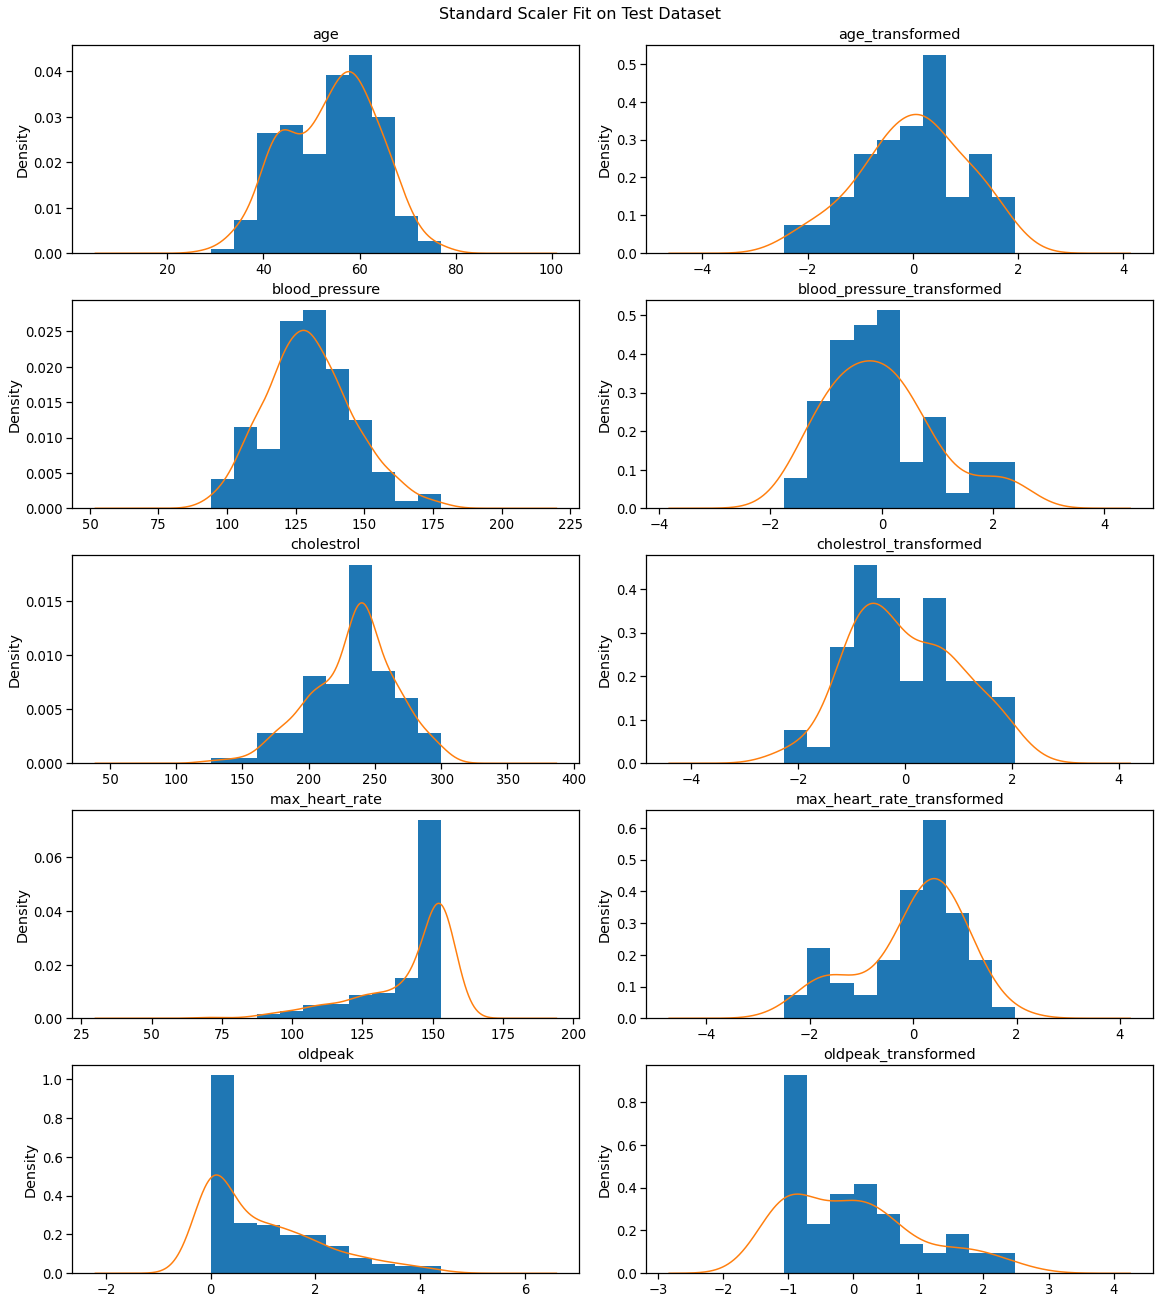

In [550]:
#transform the data
scaler=StandardScaler()
scaler_fit = scaler.fit_transform(test_dataset[val_cols_names])
scaler_fit = pd.DataFrame(scaler_fit, index=test_dataset.index, columns=val_cols_names)

#plotting the training dataset
plot_histograms_density(test_dataset, val_cols_names, scaler_fit, 'Standard Scaler Fit on Test Dataset')

Step 6. We will see the different scaling what does to our data below for both test and training dataset

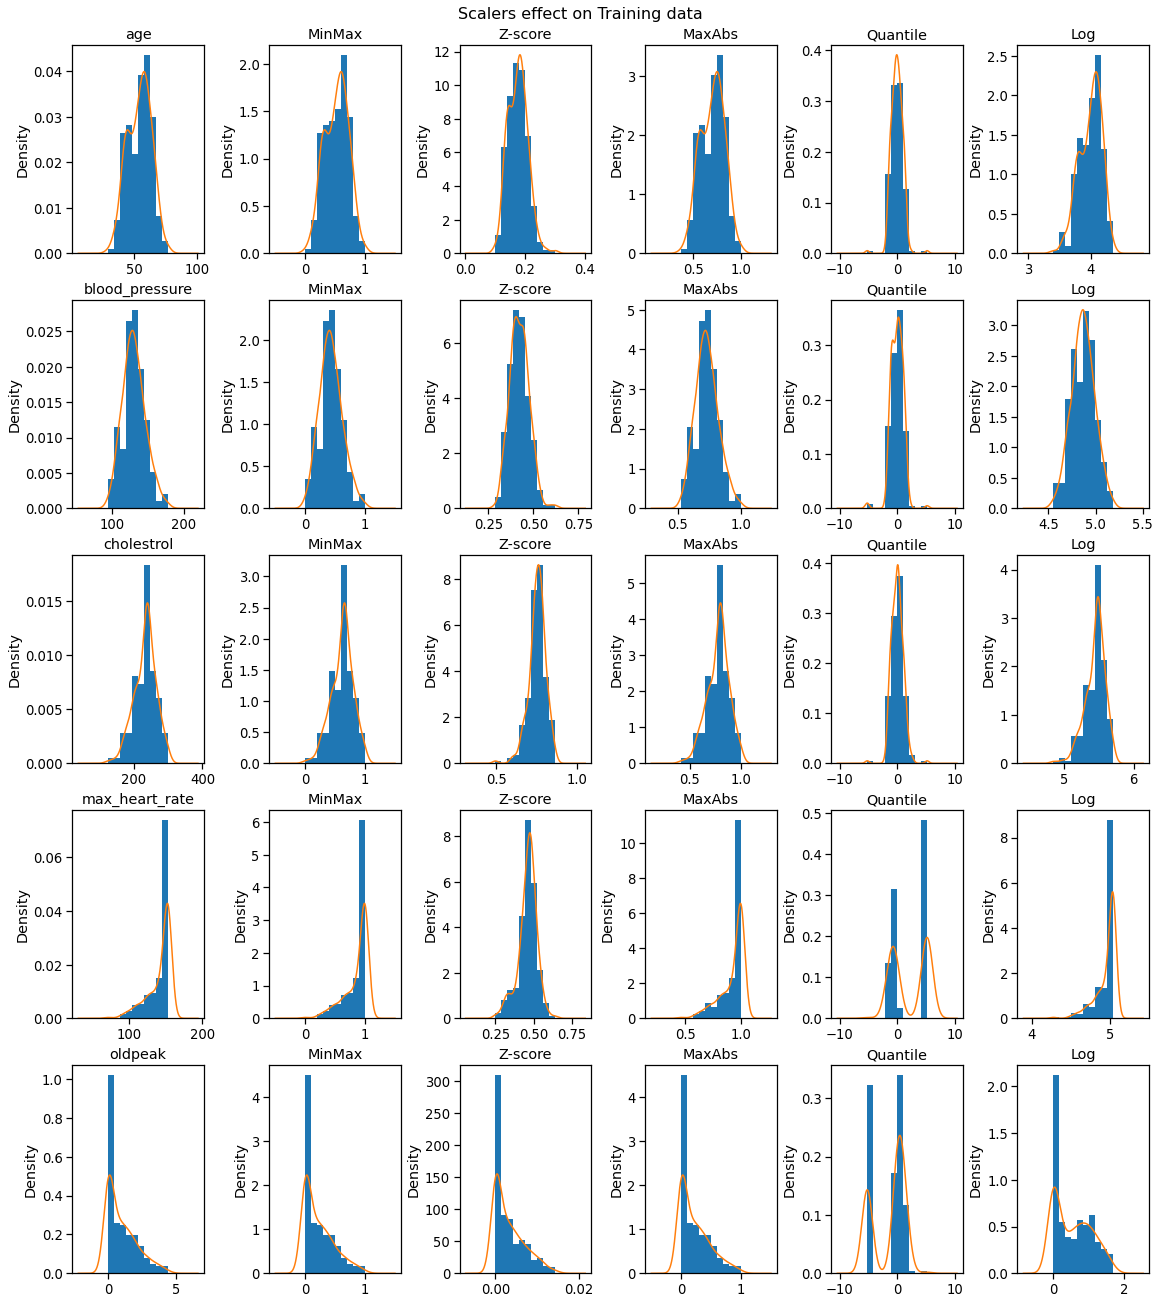

In [551]:
def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        training_ds_updated[c].hist(ax=axs[i], density=True) # normalizes the density
        training_ds_updated[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1
            
val_cols_names = ['age','blood_pressure', 'cholestrol', 'max_heart_rate', 'oldpeak']

scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'),FunctionTransformer(np.log1p)]
plot_histograms_density_for_scalers(training_ds_updated, val_cols_names, 'Scalers effect on Training data', arr_scalers, scaler_names)



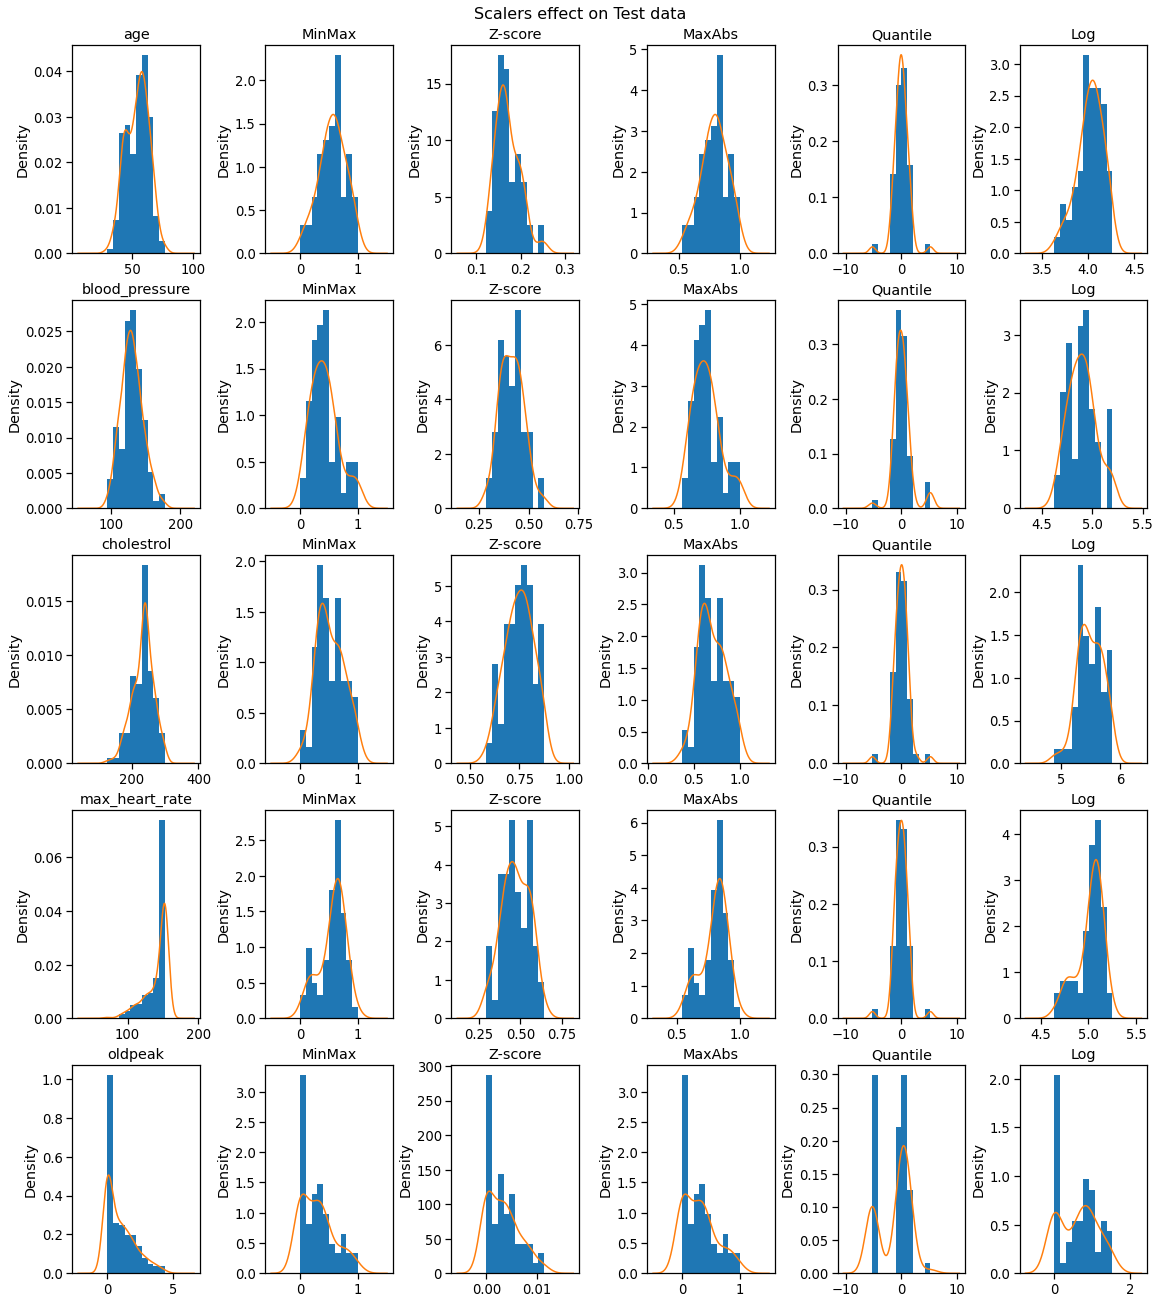

In [552]:
#plotting effect of scaling on test dataset.
plot_histograms_density_for_scalers(test_dataset, val_cols_names, 'Scalers effect on Test data', arr_scalers, scaler_names)

### Model Training and Testing

Step 1. Applying KNN as my 1st Algorithm and storing its accuracy output in a dataframe.

In [553]:
# X is all the other variables
X = training_ds_updated.drop(['output'], axis=1).to_numpy()
# y is has_diabetes that we want to forecast
y = training_ds_updated['output'].to_numpy()

# Let's estimate the values for several rounds of cross-validation. Let's use F-score as our desired metric
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_val_score(knn_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

df_outcomes = pd.DataFrame()
df_outcomes['KNN'] = knn_scores
df_outcomes

,KNN
0,0.613168
1,0.739130
2,0.565217
3,0.565217
4,0.733954
5,0.656187
6,0.624224
7,0.790546
8,0.739130
9,0.454545


Step 2. Implementing Logistic Regression with KFold as my 2nd Algorithm

In [554]:
#defining variable columns and output column
variable_columns = ['age','blood_pressure','cholestrol','max_heart_rate','exercise','oldpeak','sex_2','cp_2','cp_3',
                    'cp_4','fasting_blood_sugar_1.0','resting_electrocardiographic_result_1.0',
                    'resting_electrocardiographic_result_2.0','slp_1.0','slp_2.0','number_of_major_vessel_1.0',
                    'number_of_major_vessel_2.0','number_of_major_vessel_3.0','thalassemia_1.0','thalassemia_2.0',
                    'thalassemia_3.0']
output_column = ['output']
 
#Loading the dataset
X = training_ds_updated[variable_columns]
y = training_ds_updated[output_column]

#it will store all the accuracy values from each fold in every iteration
parent_list = []


#Implementing cross validation
for i in range(3):
    
    k=10
    kf = KFold(n_splits=k, random_state=None, shuffle=True)
    model = LogisticRegression(solver= 'liblinear')
 
    acc_score = []

    for train_index , test_index in kf.split(X):

        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]

        model.fit(X_train,y_train.values.ravel())
        pred_values = model.predict(X_test)

        acc = round(accuracy_score(pred_values , y_test),6)
        acc_score.append(acc)
        parent_list.append(acc)
        
  
    avg_acc_score = round(sum(acc_score)/k,6)
    
    print('accuracy of each fold - {}'.format(acc_score))

    print('Avg accuracy : {}'.format(avg_acc_score))
    
    


#from list to converting to dictionary
dict = {'KFOLD': parent_list} 
    
#adding to the dataframe with accuracy results with column name
df_outcomes['KFOLD'] = pd.DataFrame(dict)
df_outcomes
    
    

accuracy of each fold - [0.826087, 0.869565, 0.826087, 0.826087, 0.913043, 0.869565, 0.956522, 0.869565, 0.956522, 0.727273]
Avg accuracy : 0.864032
accuracy of each fold - [0.913043, 0.73913, 0.826087, 1.0, 0.913043, 0.913043, 0.826087, 0.913043, 0.869565, 0.909091]
Avg accuracy : 0.882213
accuracy of each fold - [0.826087, 0.73913, 0.913043, 0.782609, 0.869565, 0.913043, 0.956522, 0.869565, 0.869565, 0.909091]
Avg accuracy : 0.864822


,KNN,KFOLD
0,0.613168,0.826087
1,0.739130,0.869565
2,0.565217,0.826087
3,0.565217,0.826087
4,0.733954,0.913043
5,0.656187,0.869565
6,0.624224,0.956522
7,0.790546,0.869565
8,0.739130,0.956522
9,0.454545,0.727273


Step 3. Implementing Linear Classification as my 3rd Algorith.

In [555]:
# here we create a linear classification model
lin_model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=500)
# X is all the other variables
X = training_ds_updated.drop(['output'], axis=1).to_numpy()
# y is has_diabetes that we want to forecast
y = training_ds_updated['output'].to_numpy()

# Let's estimate the values for several rounds of cross-validation. Let's use F-score as our desired metric
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lin_scores = cross_val_score(lin_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

df_outcomes['Linear Classification'] = lin_scores
df_outcomes

,KNN,KFOLD,Linear Classification
0,0.613168,0.826087,0.417391
1,0.739130,0.869565,0.263505
2,0.565217,0.826087,0.263505
3,0.565217,0.826087,0.220109
4,0.733954,0.913043,0.408213
5,0.656187,0.869565,0.460635
6,0.624224,0.956522,0.220109
7,0.790546,0.869565,0.570792
8,0.739130,0.956522,0.125937
9,0.454545,0.727273,0.193939


### Plot Training Accuracy

Step 1. Will Plot the accuracy results dataset which was builded in the previous section with boxplot to check the distribution of accuracy

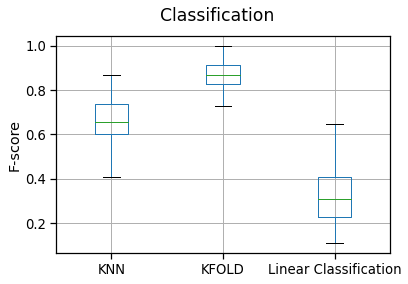

In [556]:
boxplot = df_outcomes.boxplot() 
boxplot.set_ylabel('F-score')
plt.suptitle('Classification')
plt.show()

From the above diagram, we can see that K-Fold have the most accuracy close to 90% ehile KNN have the moderate close to 75% and Linear Classification with the lowest score of slighlty above 45% accuracy.

Step 2. Now I will apply data transformation on the models to check if there are any improvement for the Algorithms. Here i will work with **KNeighborsClassifier**

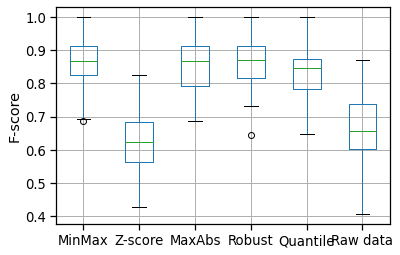

In [557]:
scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}


model = KNeighborsClassifier(n_neighbors=3)


for i in range (len(arr_scalers)):
    # X is all the other variables
    X = training_ds_updated.drop(['output'], axis=1).to_numpy()
    # Let's tranform X     
    X_t = arr_scalers[i].fit_transform(X)
    # y is has_diabetes that we want to forecast
    y = training_ds_updated['output'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = scores

# Now let's create the model with the raw data just to put the models side-by-side
X = training_ds_updated.drop(['output'], axis=1).to_numpy()
y = training_ds_updated['output'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['Raw data'] = scores

# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('F-score')
plt.show()


From the graph, we can see that, with applying transformation like **MinMax**, **MaxAbs**, & **Robust** have an significant boost for the algorithm, Before the accuracy was close to 75% now it become more than 90% accuracy. Thus for **KNeighborsClassifier** algorithm **MinMax**, **MaxAbs**, & **Robust** have the best data transformation, and all of them are pretty much close to each other achieving accuracy.

Step 3. I will apply the same technique for **SGDClassifier** to check if we can achieve any improvement in our algorithm.

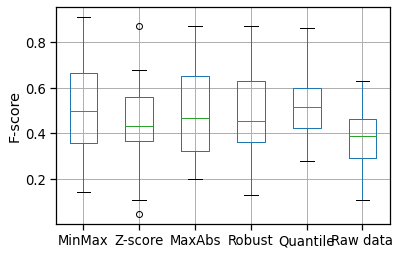

In [558]:
scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}



model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=1000)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = training_ds_updated.drop(['output'], axis=1).to_numpy()
    # Let's tranform X     
    X_t = arr_scalers[i].fit_transform(X)
    # y is has_diabetes that we want to forecast
    y = training_ds_updated['output'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = scores

# Now let's create the model with the raw data just to put the models side-by-side
X = training_ds_updated.drop(['output'], axis=1).to_numpy()
y = training_ds_updated['output'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['Raw data'] = scores

# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('F-score')
plt.show();


From the graphm we can see that **Quantile**, **MinMax**, **MaxAbs** & **Robust** transformation have boost the accuracy, while minmax have given the max boost in case of accuracy.

From the above models, I will choose KFOLD with Logistic Regression as it has given us maximum accuracy even without appyling the scaling methods.

### Output Test Prediction

In [590]:
#defining and spliting test train data
train_data = training_ds_updated.drop(['output'], axis=1)
target = training_ds_updated['output']
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size = 0.2)

#applying logistic regression
lr = LogisticRegression(random_state = 0, solver= 'liblinear')
lr.fit(X_train, y_train)
test_output = lr.predict(X_test)
train_pred = lr.predict(X_train)

#confusion matrix and accuracy
cm = confusion_matrix(y_test, test_output)
print(cm)

accuracy_score(y_test, test_output)



[[21  1]
 [ 1 23]]


0.9565217391304348

### Best Test Accuracy

Step 1. Setting the threshold at 0.5 assumes that we’re not making trade-offs for getting false positives or false negatives. The probability for each row/person in the test set on their output of heart disease. 

In [591]:
threshold = 0.5
lr.predict_proba(X_test)[:,1]

array([0.20402008, 0.93460594, 0.76833479, 0.7829209 , 0.69356316,
       0.97142585, 0.17139045, 0.00337578, 0.9652069 , 0.11698067,
       0.01339636, 0.06910583, 0.98145861, 0.17833634, 0.17766847,
       0.80952919, 0.81065674, 0.36048395, 0.86616668, 0.03645685,
       0.967993  , 0.65547385, 0.98683476, 0.75726855, 0.68435709,
       0.4062527 , 0.96754299, 0.69570662, 0.04836537, 0.92837826,
       0.87697504, 0.91037626, 0.02560053, 0.01475299, 0.0213948 ,
       0.27333446, 0.21720281, 0.87507829, 0.83504027, 0.36909903,
       0.19811566, 0.06702739, 0.11073478, 0.10589935, 0.991809  ,
       0.97257217])

Step 2. Checking if it has passed the threshold value or not

In [592]:
lr.predict_proba(X_test)[:,1]> threshold

array([False,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True])

Step 3. prints a 1 if the chance of having disease is greater than 0.5

In [593]:
(lr.predict_proba(X_test)[:,1] > threshold).astype(int)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1])

Step 4. Checking Accuracy of Score

In [594]:
score = accuracy_score(y_test, test_output)
print('Test Accuracy Score', score)

Test Accuracy Score 0.9565217391304348


Step 5. Checking cross validation accuracy

In [595]:
scores = cross_val_score(lr, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.84210526 0.89473684 0.84210526 0.83333333 0.83333333 1.
 0.83333333 0.77777778 0.88888889 0.83333333]


Step 6. Checking Range of Score

In [596]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7777777777777778, 0.8578947368421053, 1.0)

We can see that the minimum score of our model is 77% while mean in almost 86%. 